In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("Mall_Customers.csv", encoding='latin-1')  # Fixes hidden character issues
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Check cleaned data
df.head()

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


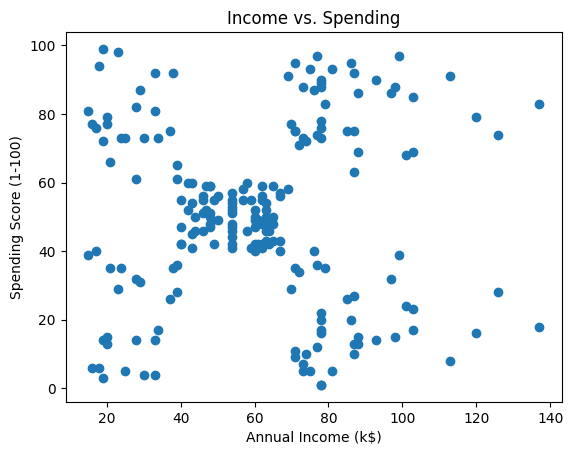

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs. Spending')
plt.show()

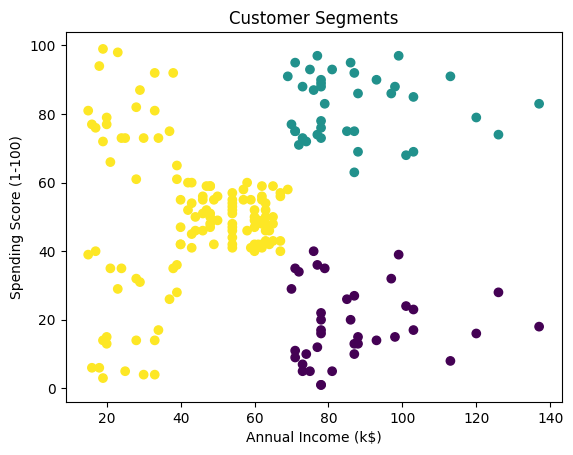

In [ ]:
from sklearn.cluster import KMeans

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Train K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

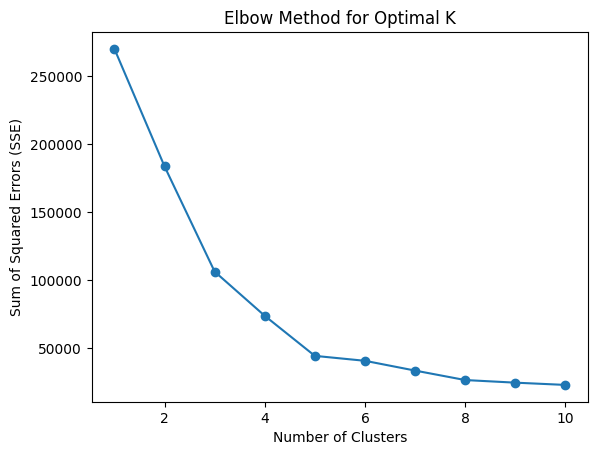

In [ ]:
# Add this code after your initial K-Means clustering
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Example labels based on K=5 clusters
cluster_labels = {
    0: "Budget Shoppers",
    1: "Career-Focused Spenders",
    2: "Balanced Consumers",
    3: "Young Savers",
    4: "High-Rollers"
}

df['Segment'] = df['Cluster'].map(cluster_labels)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster             Segment  
0        2  Balanced Consumers  
1        2  Balanced Consumers  
2        2  Balanced Consumers  
3        2  Balanced Consumers  
4        2  Balanced Consumers  


In [ ]:
!pip install plotly  # Run this once
import plotly.express as px

fig = px.scatter(df,
                 x='Annual Income (k$)',
                 y='Spending Score (1-100)',
                 color='Segment',
                 title='Customer Segments',
                 hover_data=['Age', 'Gender'])
fig.show()

In [ ]:
from google.colab import files
fig.write_html("customer_segments.html")
files.download("customer_segments.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>